In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
files = os.listdir()
dfs = [pd.read_csv(f) for f in files if f.endswith(".csv")]
dfs = dfs[2:]

In [3]:
df = pd.concat(dfs, ignore_index=True)

In [4]:
df.groupby(["method", "model"])["metric"].max()

method  model
corr    LDA      4800
        LR       4800
        NN       5200
        RF       5400
        SVM      4950
        XGB      5250
kbest   LDA      4800
        LR       4800
        NN       4800
        RF       5400
        SVM      4950
        XGB      5250
mean    LDA      5250
        LR       5250
        NN       5300
        RF       5100
        SVM      4750
        XGB      5200
rfe     LDA      5200
        LR       5200
        NN       5350
        RF       4850
        SVM      5150
        XGB      5050
seq     LDA      6000
        LR       6000
        NN       6800
        RF       6100
        SVM      6950
        XGB      6100
sfm     LDA      5450
        LR       5450
        NN       6350
        RF       6800
        SVM      7250
        XGB      6700
Name: metric, dtype: int64

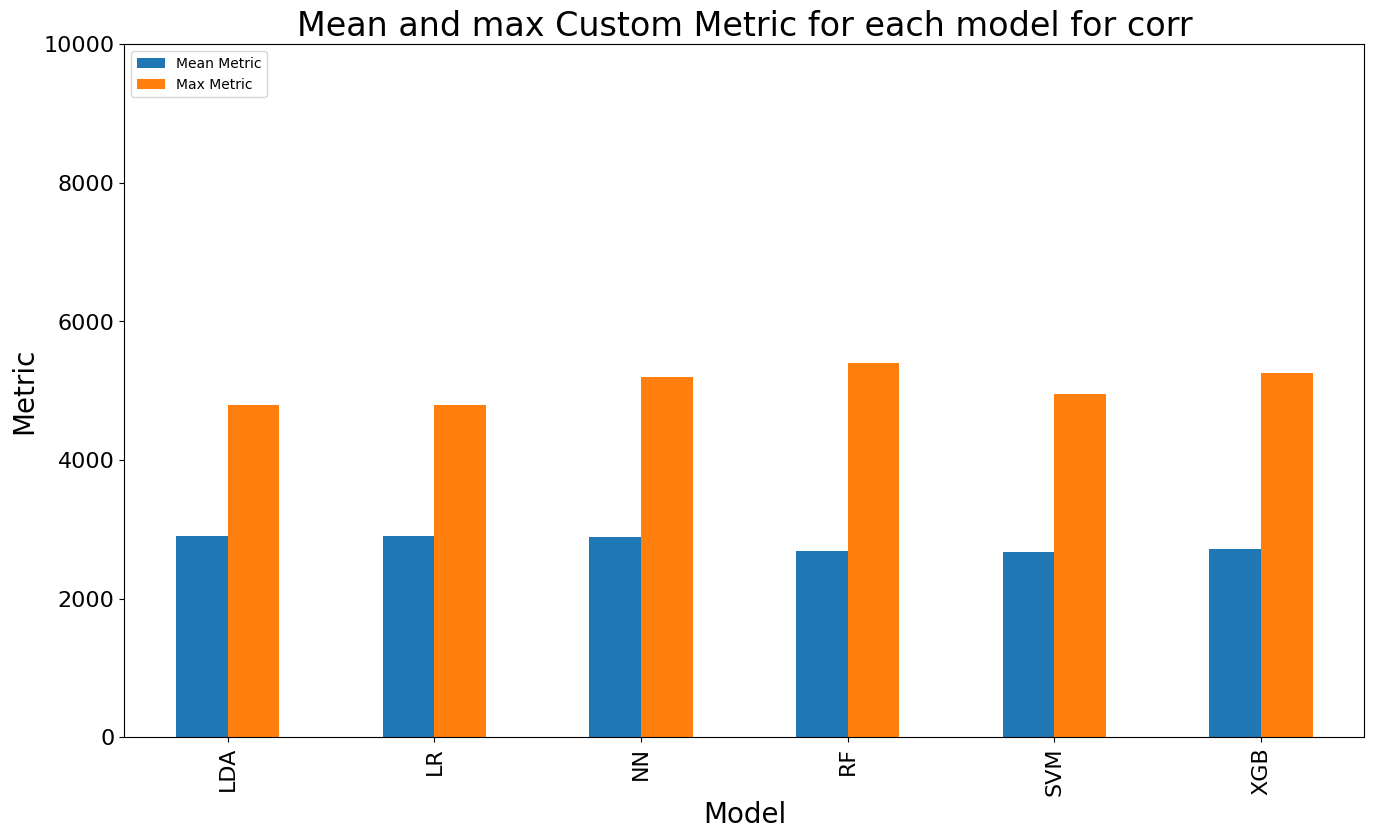

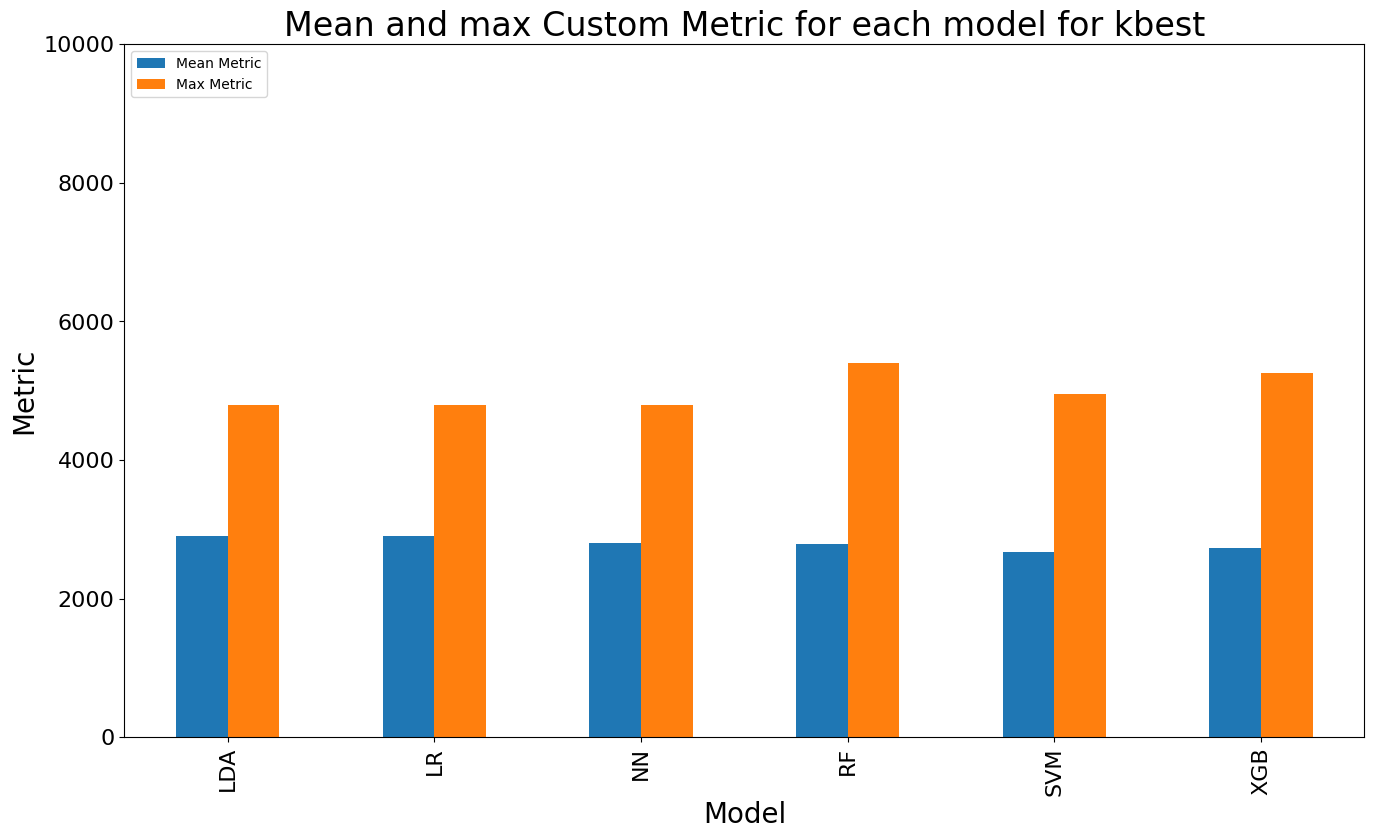

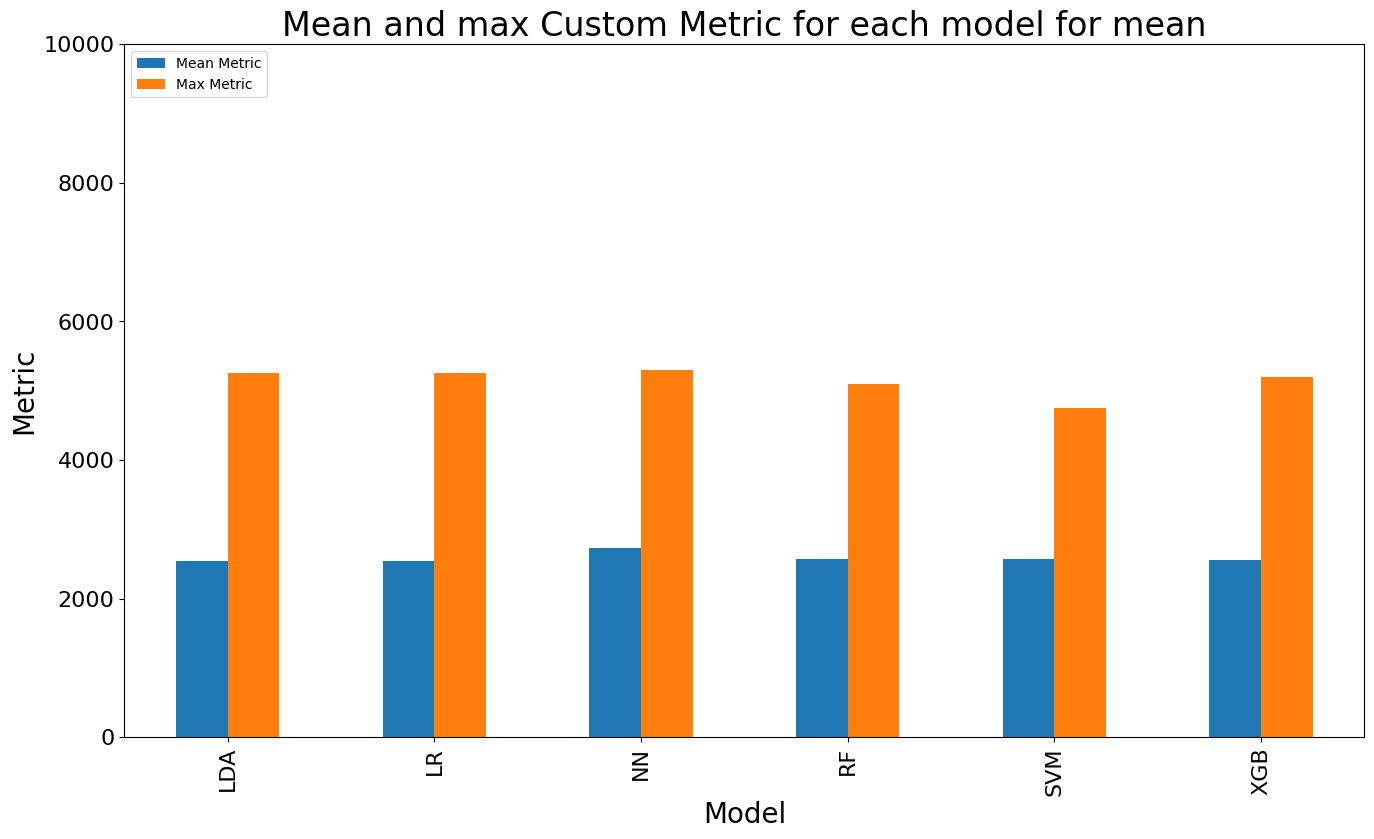

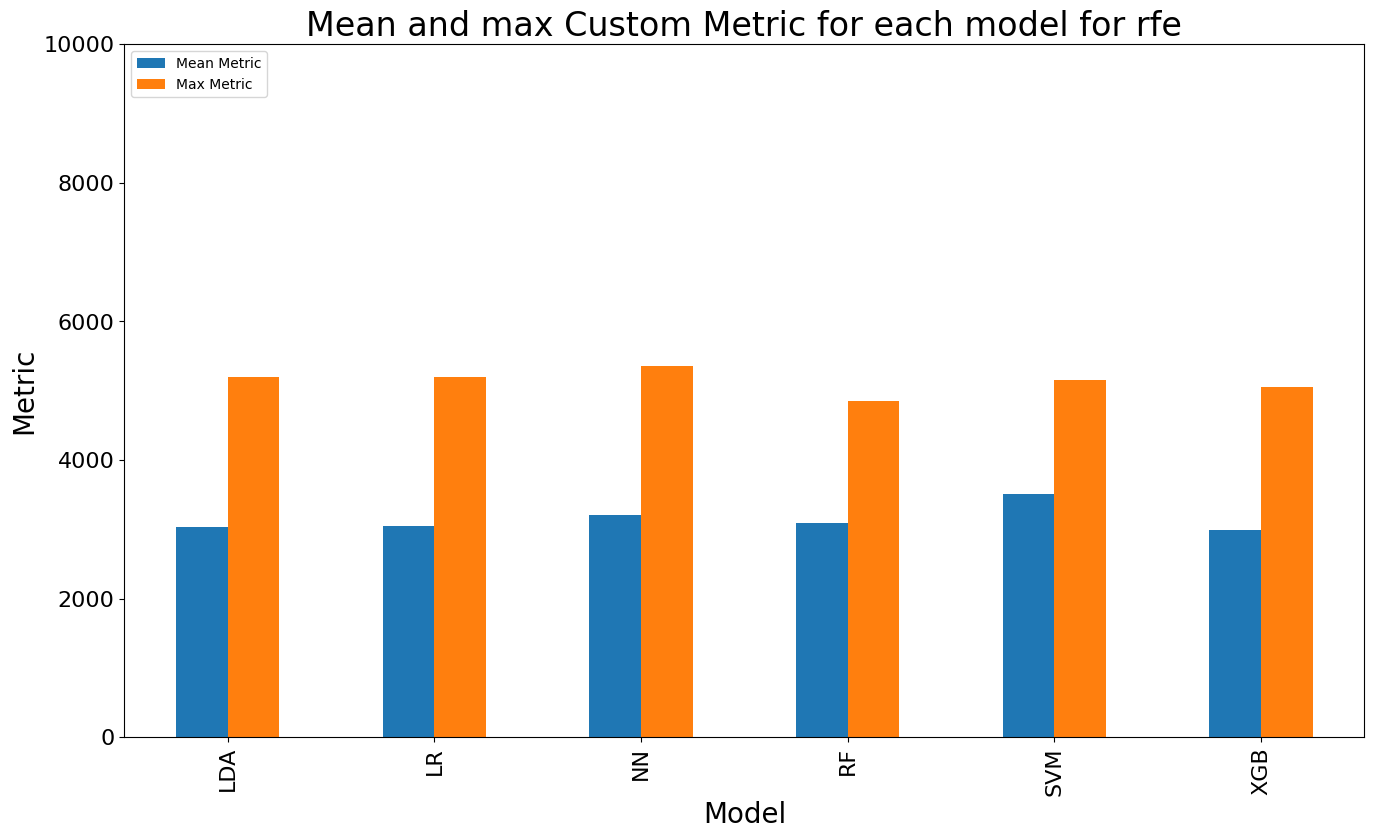

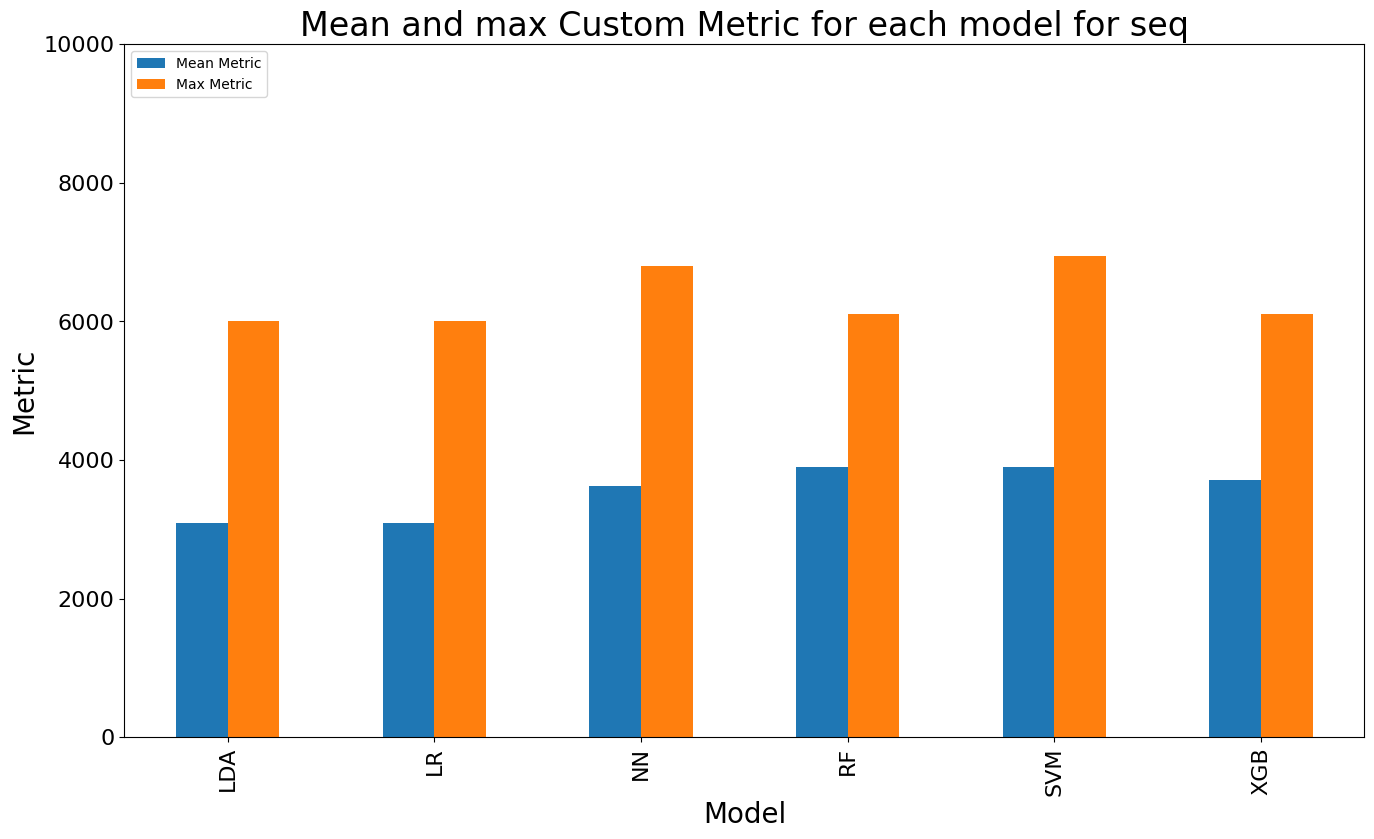

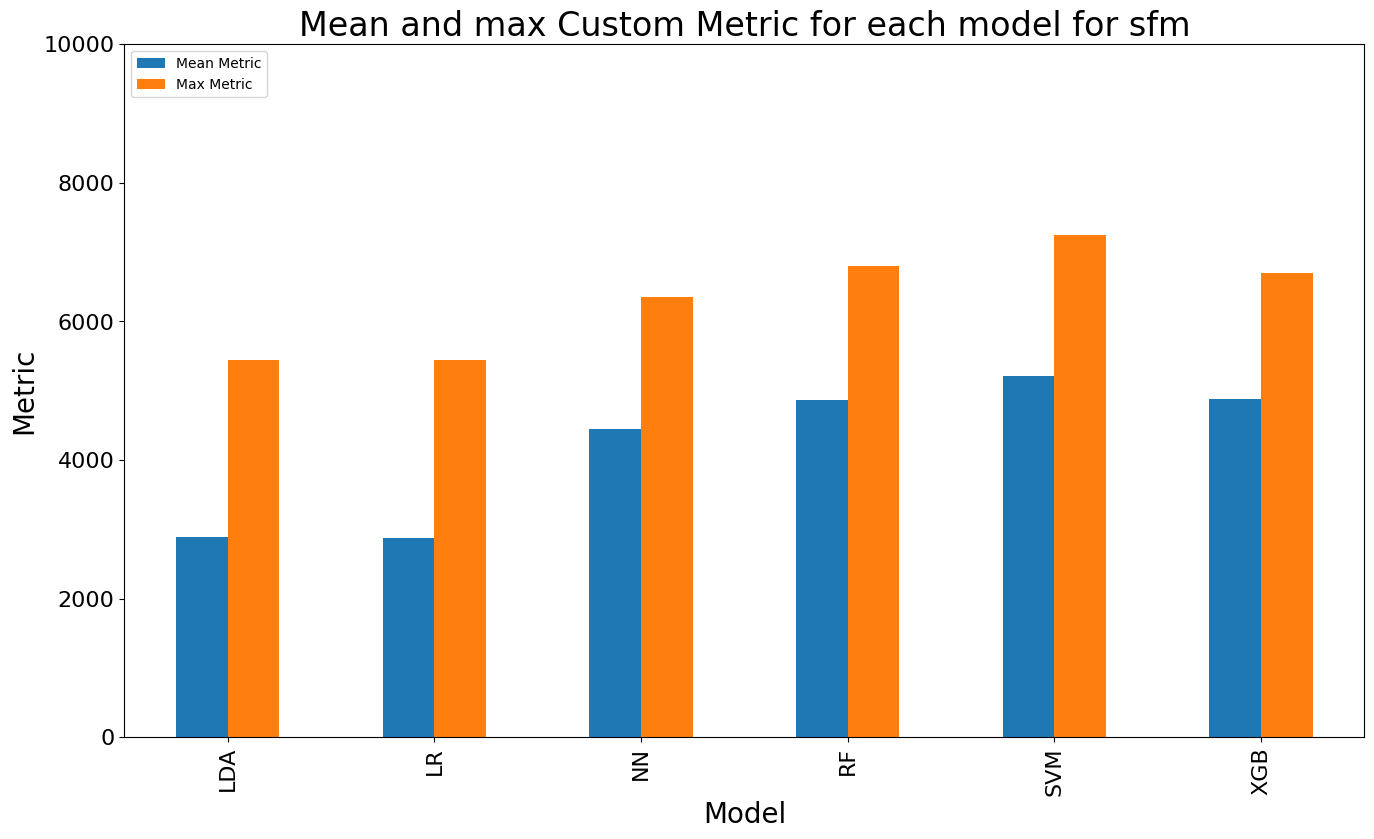

In [5]:
for df in dfs:
    method = df["method"].values[0]

    # Calculate mean accuracy
    mean_accuracy = df.groupby("model")["metric"].mean()

    # Calculate max accuracy
    max_accuracy = df.groupby("model")["metric"].max()

    # Combine mean and max accuracy into a single DataFrame
    df_combined = pd.DataFrame({
        'Mean Metric': mean_accuracy,
        'Max Metric': max_accuracy
    })

    # Plot the combined DataFrame as a bar chart
    ax = df_combined.plot(kind='bar', figsize=(16, 9))
    plt.ylabel("Metric", fontsize=20)
    plt.title(f"Mean and max Custom Metric for each model for {method}", fontsize=24)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Model", fontsize=20)
    plt.ylim(0, 10_000)

    plt.legend(loc="upper left")

    # Show plot
    plt.show()
